In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
date_range = pd.date_range(start="2023-01-01", periods=100, freq="h")

np.random.seed(42)
data = {
    "Date": date_range,
    "Temperature": np.random.uniform(25, 32, len(date_range))
}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

In [ ]:
print("\nTotal number of rows:", len(df))


Total number of rows: 100


In [ ]:
num_missing = 10
missing_indices = np.random.choice(df.index, num_missing, replace=False)
df.loc[missing_indices, "Temperature"] = np.nan

print("Before Interpolation:\n", df.head(15))

Before Interpolation:
                      Temperature
Date                            
2023-01-01 00:00:00    27.621781
2023-01-01 01:00:00    31.655000
2023-01-01 02:00:00    30.123958
2023-01-01 03:00:00    29.190609
2023-01-01 04:00:00    26.092130
2023-01-01 05:00:00    26.091962
2023-01-01 06:00:00          NaN
2023-01-01 07:00:00          NaN
2023-01-01 08:00:00    29.207805
2023-01-01 09:00:00          NaN
2023-01-01 10:00:00    25.144091
2023-01-01 11:00:00    31.789369
2023-01-01 12:00:00    30.827098
2023-01-01 13:00:00          NaN
2023-01-01 14:00:00    26.272775


In [ ]:
df["Day"] = df.index.date

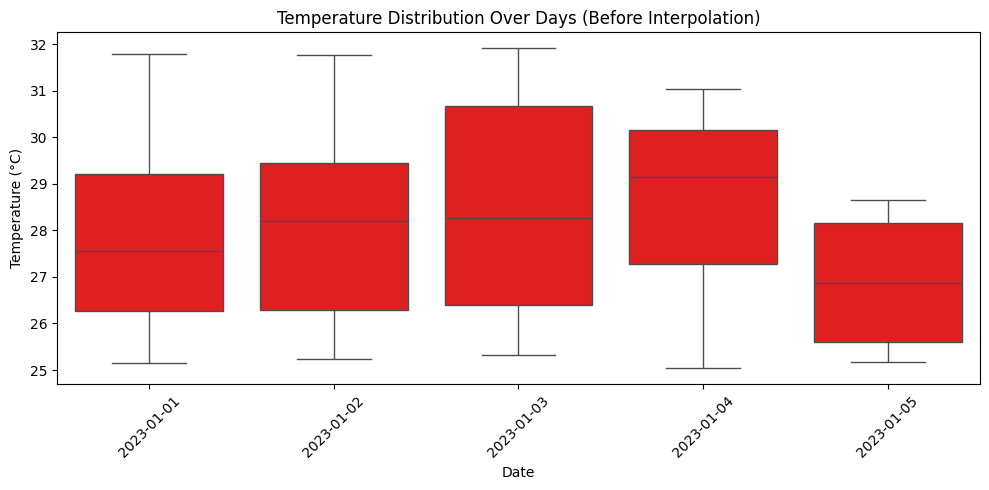

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Day"].astype(str), y=df["Temperature"], color="red")
plt.title("Temperature Distribution Over Days (Before Interpolation)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df["Temperature"] = df["Temperature"].interpolate(method="linear")

print("After Interpolation:\n", df.head(15))

After Interpolation:
                      Temperature         Day
Date                                        
2023-01-01 00:00:00    27.621781  2023-01-01
2023-01-01 01:00:00    31.655000  2023-01-01
2023-01-01 02:00:00    30.123958  2023-01-01
2023-01-01 03:00:00    29.190609  2023-01-01
2023-01-01 04:00:00    26.092130  2023-01-01
2023-01-01 05:00:00    26.091962  2023-01-01
2023-01-01 06:00:00    27.130576  2023-01-01
2023-01-01 07:00:00    28.169191  2023-01-01
2023-01-01 08:00:00    29.207805  2023-01-01
2023-01-01 09:00:00    27.175948  2023-01-01
2023-01-01 10:00:00    25.144091  2023-01-01
2023-01-01 11:00:00    31.789369  2023-01-01
2023-01-01 12:00:00    30.827098  2023-01-01
2023-01-01 13:00:00    28.549937  2023-01-01
2023-01-01 14:00:00    26.272775  2023-01-01


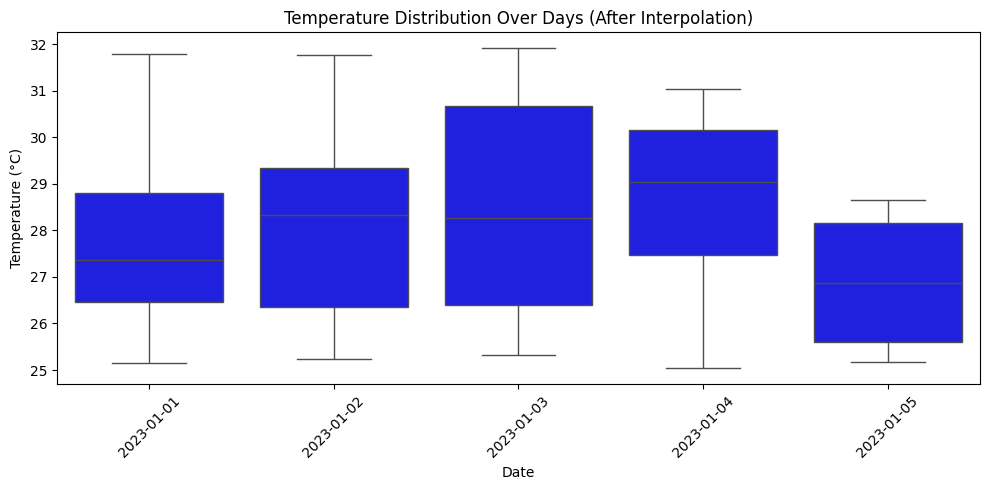

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Day"].astype(str), y=df["Temperature"], color="blue")
plt.title("Temperature Distribution Over Days (After Interpolation)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()